In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV 
  

In [3]:
diabetes = pd.read_csv('diabetes.csv')

In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

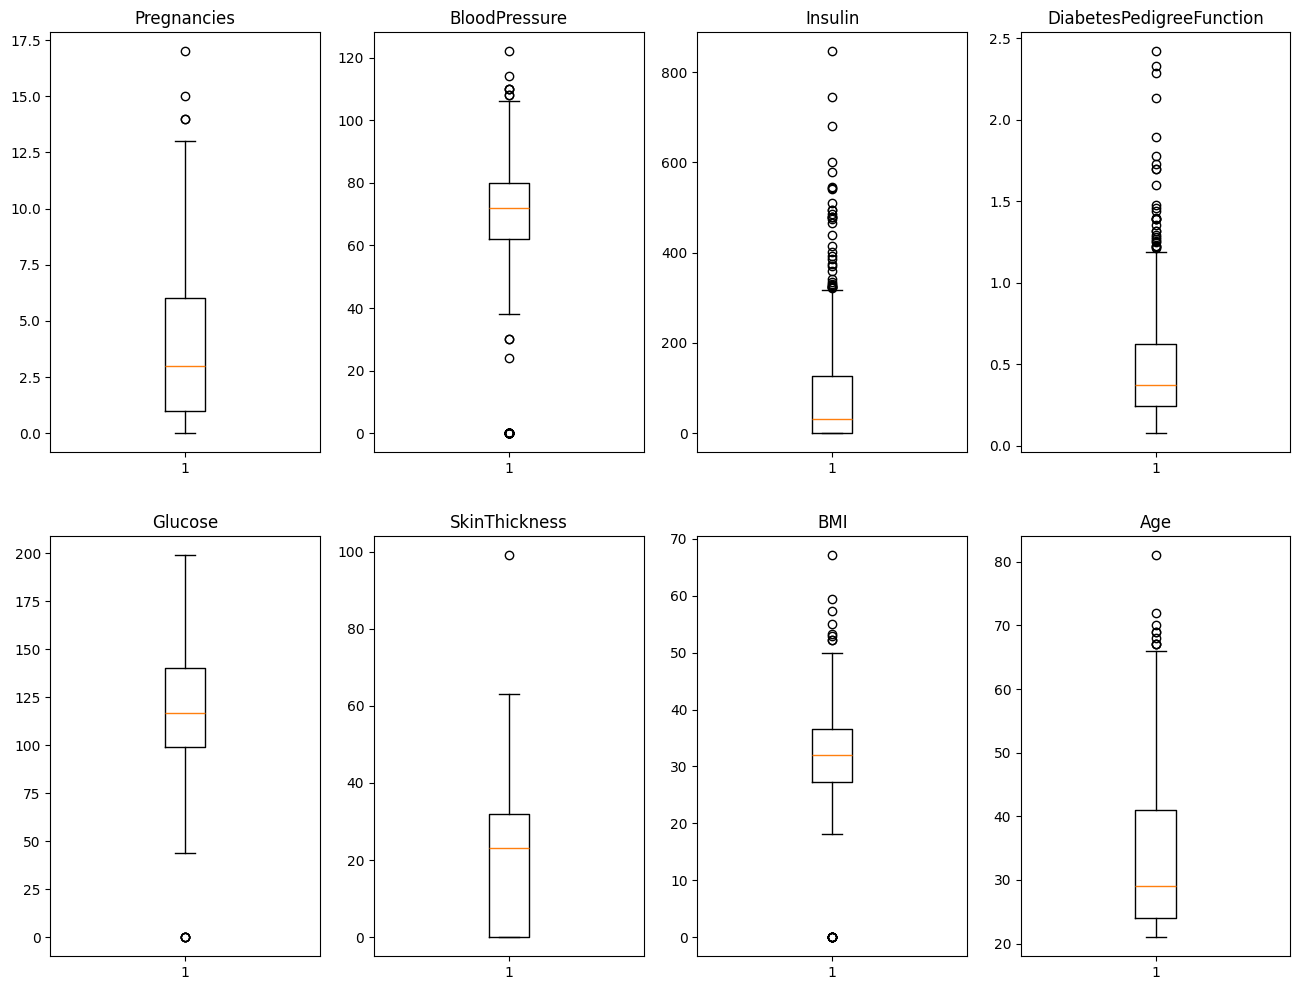

In [8]:
cols = list(diabetes.drop('Outcome', axis='columns').columns)

fig, axs = plt.subplots(2,4)

fig.set_figheight(12)
fig.set_figwidth(16)
x = 0

for i in range(len(cols)):
    if i % 2 == 0:
        axs[0,x].boxplot(diabetes[cols[i]])
        axs[0,x].set_title(cols[i])
    else:
        axs[1,x].boxplot(diabetes[cols[i]])
        axs[1,x].set_title(cols[i])
        x += 1

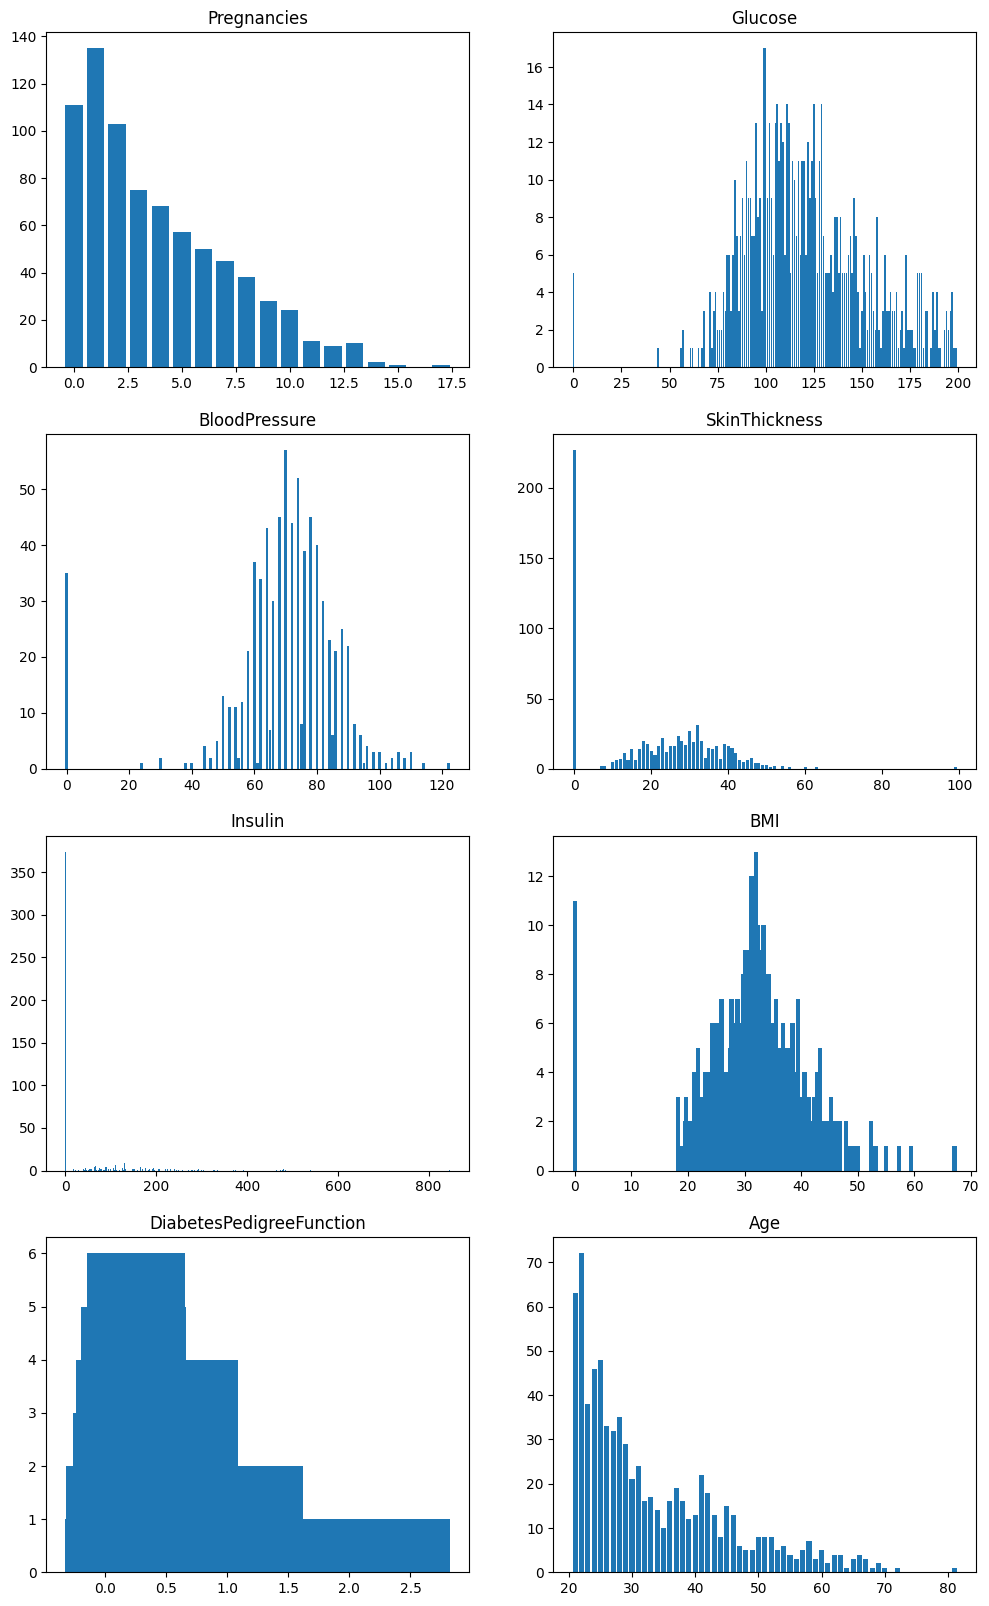

In [9]:
fig2, axs2 = plt.subplots(4,2)

fig2.set_figheight(20)
fig2.set_figwidth(12)
n = 0

for i in range(len(cols)):
    x = list(diabetes.groupby([cols[i]])['Outcome'].count().keys())
    height = list(diabetes.groupby([cols[i]])['Outcome'].count())
    if i % 2 == 0:
        axs2[n,0].bar(x=x, height=height)
        axs2[n,0].set_title(cols[i])
    else:
        axs2[n,1].bar(x=x, height=height)
        axs2[n,1].set_title(cols[i])
        n += 1

Filling in missing data

In [10]:
cols_with_missing_data = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'] 
# As noticed on the histograms the above columns have some 0 values, note there are zeroes 
# for pregnancies but it is possible and the distribution looks natural

diabetes_filled = diabetes.copy()

for col in cols_with_missing_data:
    diabetes_filled[col].replace(to_replace=0, method='ffill', inplace=True)
    diabetes_filled[col].replace(to_replace=0, method='bfill', inplace=True)

diabetes_filled.describe()

C:\Users\48795\AppData\Local\Temp\ipykernel_345008\4231062640.py:8: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  diabetes_filled[col].replace(to_replace=0, method='ffill', inplace=True)
C:\Users\48795\AppData\Local\Temp\ipykernel_345008\4231062640.py:9: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  diabetes_filled[col].replace(to_replace=0, method='bfill', inplace=True)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.514323,72.308594,29.257812,157.084635,32.482031,0.471876,33.240885,0.348958
std,3.369578,30.531191,12.375474,10.544310,114.159085,6.908600,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,21.000000,78.750000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,130.000000,32.350000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,36.000000,193.250000,36.725000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Comparison of missing data and filled in

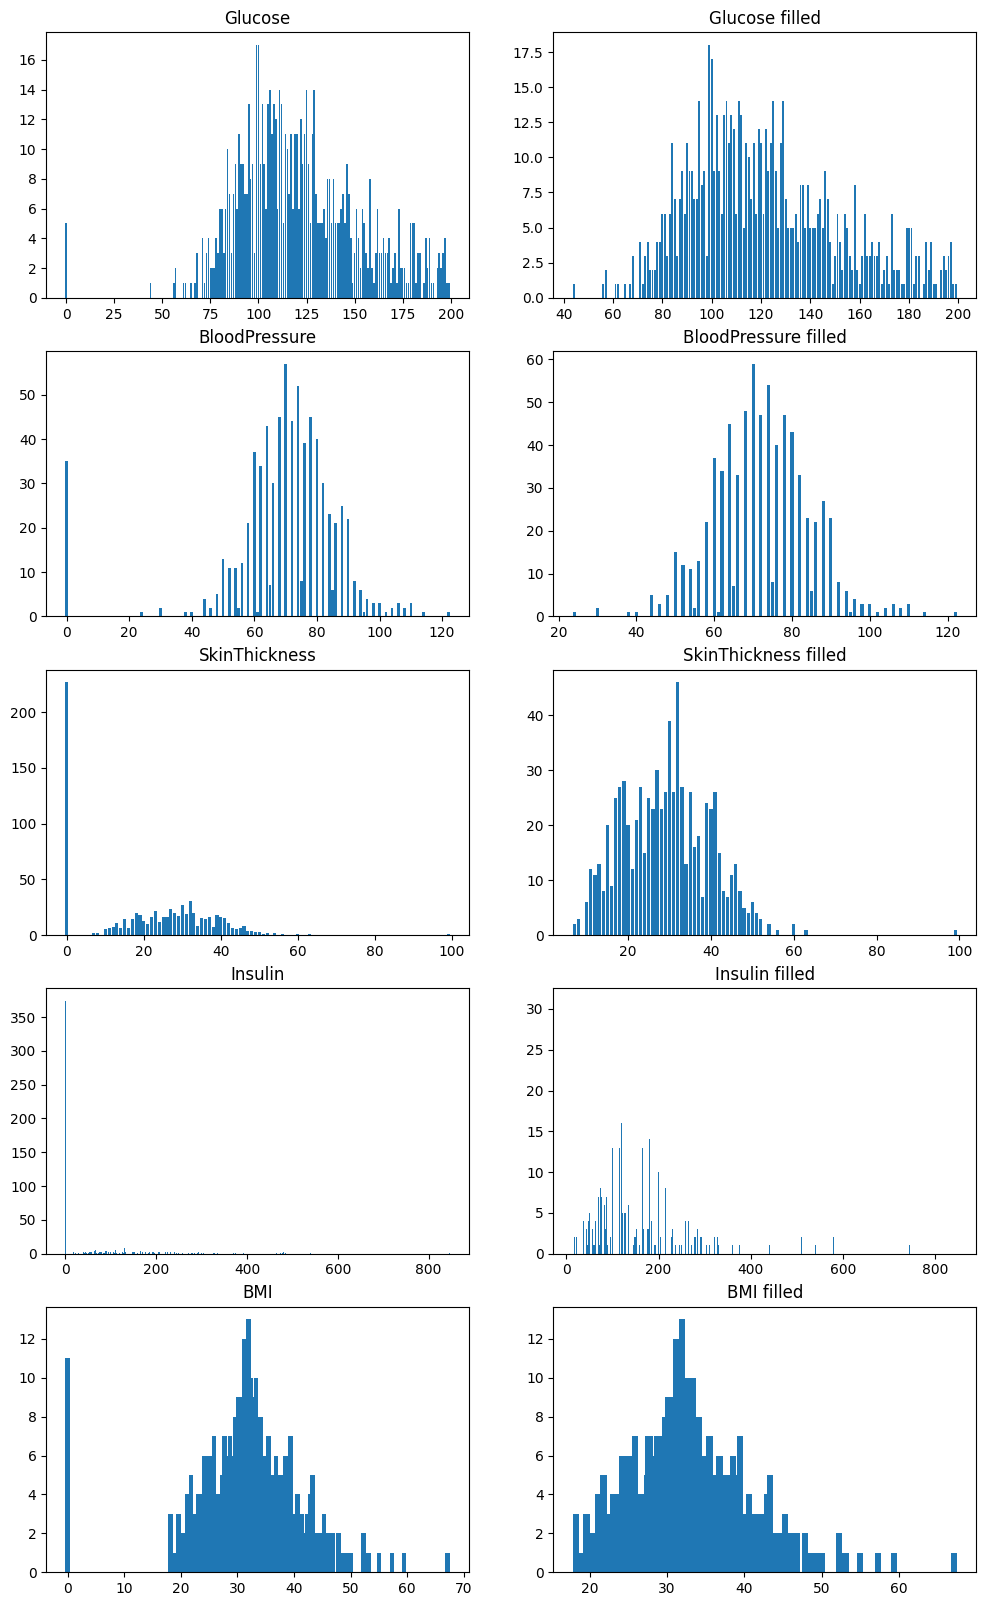

In [11]:
fig3, axs3 = plt.subplots(5,2)

fig3.set_figheight(20)
fig3.set_figwidth(12)

for i in range(len(cols_with_missing_data)):

    x = list(diabetes.groupby([cols_with_missing_data[i]])['Outcome'].count().keys())
    height = list(diabetes.groupby([cols_with_missing_data[i]])['Outcome'].count())

    x_filled = list(diabetes_filled.groupby([cols_with_missing_data[i]])['Outcome'].count().keys())
    height_filled = list(diabetes_filled.groupby([cols_with_missing_data[i]])['Outcome'].count())
   
    axs3[i,0].bar(x=x, height=height)
    axs3[i,0].set_title(cols_with_missing_data[i])

    title = cols_with_missing_data[i] + ' filled'
    axs3[i,1].bar(x=x_filled, height=height_filled)
    axs3[i,1].set_title(title)

Checking for high correlation

Text(0.5, 1.0, 'Correlation Heatmap')

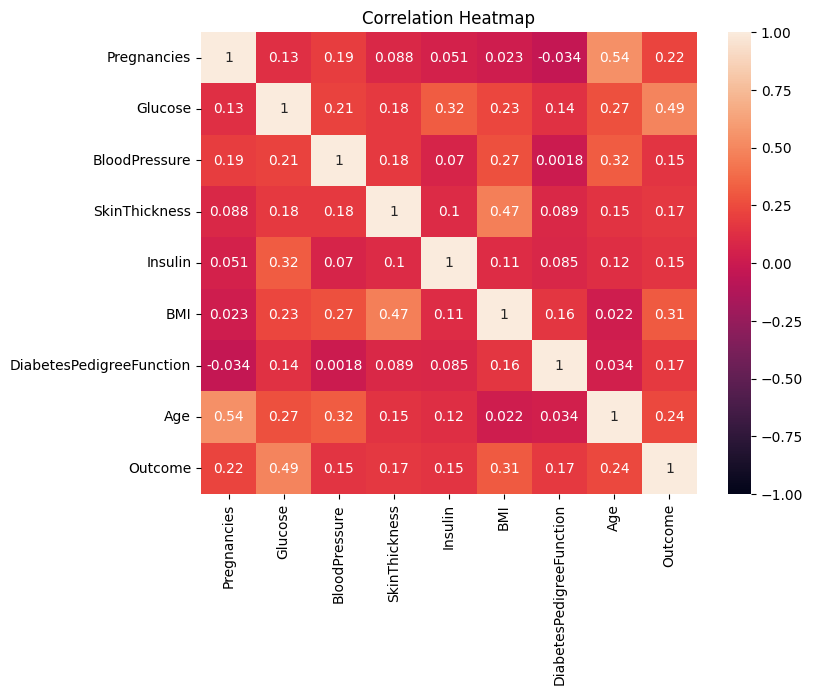

In [12]:
plt.figure(figsize=(8,6))
heatmap = sns.heatmap(diabetes_filled.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap')

Reshaping data, transforming it with PCA and splitting into train test batches

In [13]:
X = diabetes_filled.drop('Outcome', axis='columns').to_numpy().reshape(-1,8)
y = diabetes_filled['Outcome'].to_numpy()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.25)

Fitting a basic SVM

              precision    recall  f1-score   support

           0       0.72      0.90      0.80       125
           1       0.65      0.33      0.44        67

    accuracy                           0.70       192
   macro avg       0.68      0.62      0.62       192
weighted avg       0.69      0.70      0.67       192



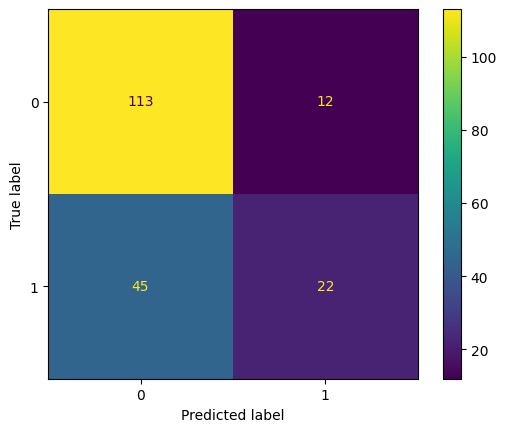

In [14]:
clf = svm.SVC(kernel='rbf', C=1)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(classification_report(y_test, y_pred))

Finding better parameters using gridsearch

In [15]:
param_grid = {'C': [10, 100, 1000],  
              'gamma': [1, 0.1, 0.01], 
              'kernel': ['linear']}  
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3) 
  
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ......C=10, gamma=1, kernel=linear;, score=0.793 total time=   8.6s
[CV 2/5] END ......C=10, gamma=1, kernel=linear;, score=0.791 total time=   9.4s
[CV 3/5] END ......C=10, gamma=1, kernel=linear;, score=0.739 total time=  15.1s
[CV 4/5] END ......C=10, gamma=1, kernel=linear;, score=0.765 total time=   8.8s
[CV 5/5] END ......C=10, gamma=1, kernel=linear;, score=0.748 total time=  10.9s
[CV 1/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.793 total time=   8.4s
[CV 2/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.791 total time=   9.3s
[CV 3/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.739 total time=  15.0s
[CV 4/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.765 total time=   8.7s
[CV 5/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.748 total time=  10.8s
[CV 1/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.793 total time=   8.4s
[CV 2/5] END ...C=10, gamma=0.01, kernel=linear;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [10, 100, 1000], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['linear']},
             verbose=3)

In [17]:
print(grid.best_params_)

{'C': 10, 'gamma': 1, 'kernel': 'linear'}


              precision    recall  f1-score   support

           0       0.69      0.90      0.78       115
           1       0.72      0.40      0.52        77

    accuracy                           0.70       192
   macro avg       0.71      0.65      0.65       192
weighted avg       0.70      0.70      0.67       192



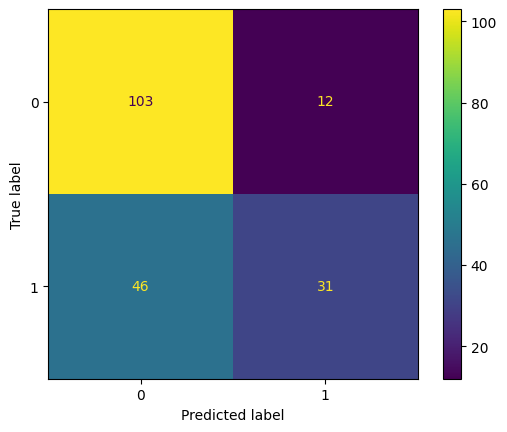

In [18]:
y_grid_pred = grid.best_estimator_.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_grid_pred)
print(classification_report(y_test, y_grid_pred))

Text(0.5, 1.0, 'Classes shown on a 2d graph using PCA')

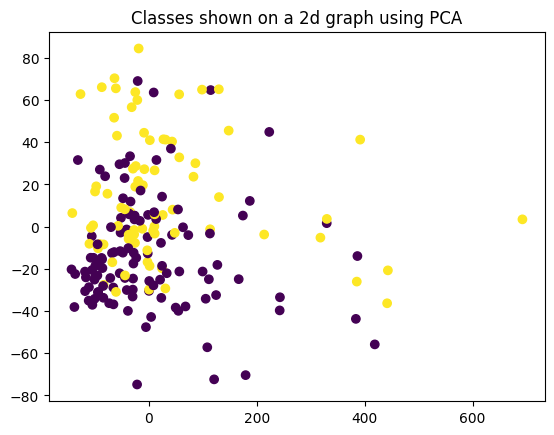

In [19]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)
plt.title('Classes shown on a 2d graph using PCA')

As we can see the classes are intersecting, making it hard for the svm to reach a high accuracy score.
Let's see how it will divide the data.

Text(0.5, 1.0, 'Class prediction using SVM')

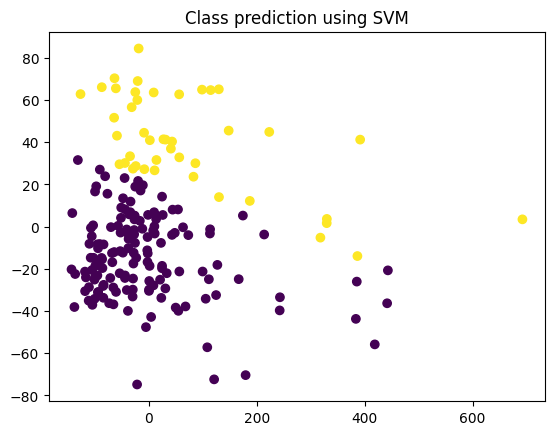

In [20]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_grid_pred)
plt.title('Class prediction using SVM')

A higher C parameter used allowed for a smaller margin to improve the score but due to the classes being so mixed the score stayed low. Perhaps a higher score would be achieved using a 3d PCA

In [15]:
pca3d = PCA(n_components=3)
X_pca3d = pca3d.fit_transform(X)

X_train_3d, X_test_3d, y_train_3d, y_test_3d = train_test_split(X_pca3d, y, test_size = 0.25)

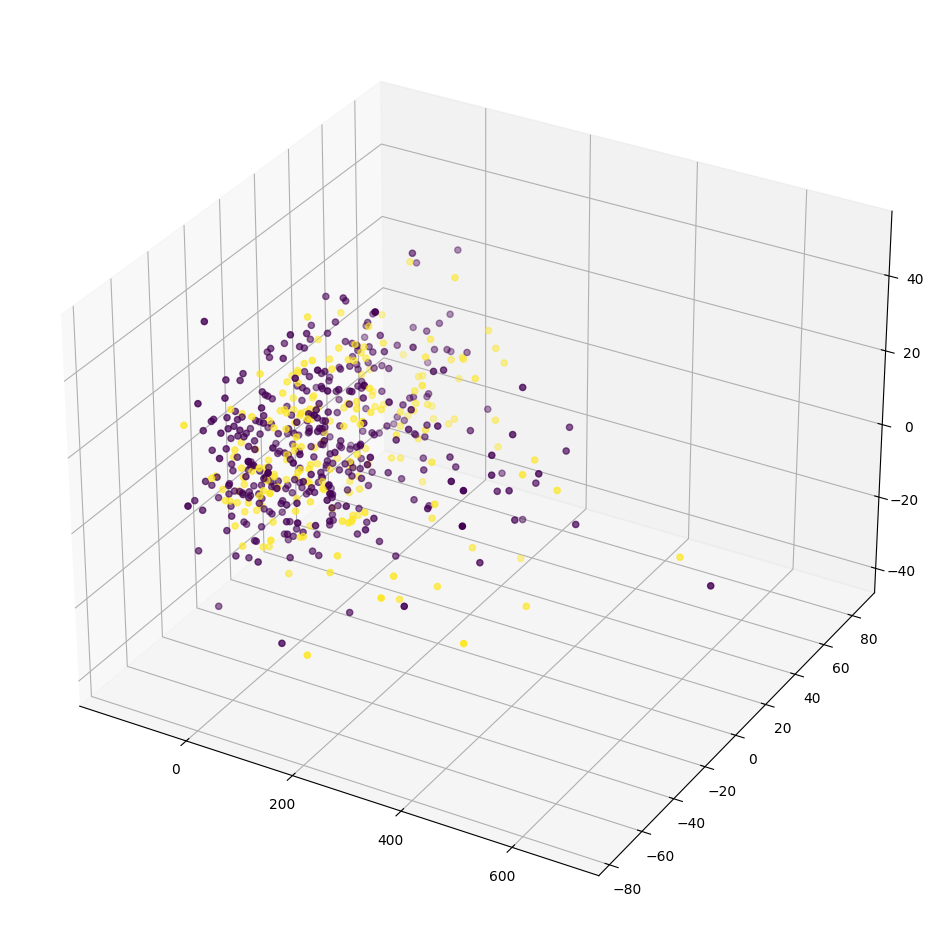

In [17]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_train_3d[:,0], X_train_3d[:,1], X_train_3d[:,2], c=y_train)

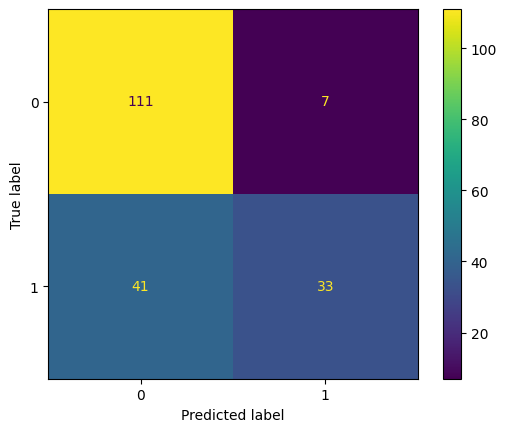

In [19]:
clf_3d = svm.SVC(C= 10, gamma= 1, kernel='linear')
clf_3d.fit(X_train_3d, y_train_3d)

y_pred_3d = clf_3d.predict(X_test_3d)

ConfusionMatrixDisplay.from_predictions(y_test_3d, y_pred_3d)

As seen, data in 3d space is still very messy and it didn't help with predictions.